In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
store_data = pd.read_csv('data/store.csv')
train_data = pd.read_csv('data/train.csv')
holdout_data = pd.read_csv('data/holdout.csv')
validation_set = pd.read_csv('data/validation.csv')
newtrain_set = pd.read_csv('data/newtrain.csv')

/home/trix_arch/.conda/envs/minicomp/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
###############################################################################################
###############################################################################################
###############################################################################################

In [4]:
# profile_store_data = ProfileReport(store_data, title="Pandas Profiling Report store_data")
# profile_store_data.to_file("Pandas_Profiling_Report_store_data.html")

In [5]:
# profile_train_data = ProfileReport(train_data, title="Pandas Profiling Report train_data")
# profile_train_data.to_file("Pandas_Profiling_Report_train_data.html")

In [6]:
# profile_holdout_data = ProfileReport(holdout_data, title="Pandas Profiling Report holdout_data")
# profile_holdout_data.to_file("Pandas_Profiling_Report_holdout_data.html")

In [7]:
###############################################################################################
###############################################################################################
###############################################################################################

In [23]:
average_sales_per_store = pd.DataFrame(columns=['Store_ID', 'Avg_Sales'])
average_sales_per_store
# for cc1 in train_data['Store'].unique().sort():
for cc1 in np.sort(newtrain_set['Store'].unique()):
    if not np.isnan(cc1):
        average_sales_per_store.loc[cc1,'Store_ID'] = cc1
        average_sales_per_store.loc[cc1,'Avg_Sales'] = newtrain_set.loc[newtrain_set.loc[:,'Store']==cc1, "Sales"].mean()

In [24]:
average_sales_per_store

,Store_ID,Avg_Sales
1.0,1.0,4825.704485
2.0,2.0,4863.668407
3.0,3.0,6909.002660
4.0,4.0,9371.876640
5.0,5.0,4656.209302
...,...,...
1111.0,1111.0,5493.231579
1112.0,1112.0,11131.632275
1113.0,1113.0,6475.711688
1114.0,1114.0,20091.239362


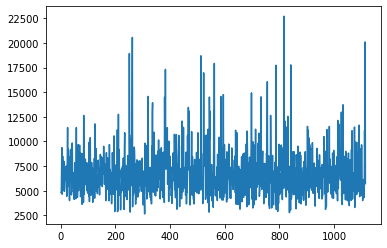

In [25]:
plt.plot(average_sales_per_store["Store_ID"], average_sales_per_store["Avg_Sales"])

<AxesSubplot:>

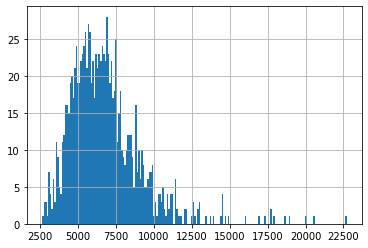

In [26]:
average_sales_per_store["Avg_Sales"].hist(bins=200)

<AxesSubplot:>

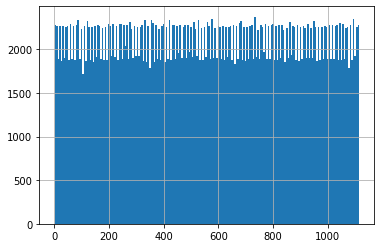

In [27]:
newtrain_set["Store"].hist(bins=200)

In [ ]:
###############################################################################################
###############################################################################################
###############################################################################################

In [41]:
actual_values_df = validation_set[["Store","Sales"]]
type(actual_values_df)

pandas.core.frame.DataFrame

In [39]:
combine_df_4metric = actual_values_df.merge(
                                average_sales_per_store, 
                                left_on='Store', right_on='Store_ID', 
                                how='left')

combine_df_4metric.loc[a["Store"]==353,:].head()

,Store,Sales,Store_ID,Avg_Sales
0,353.0,9336.0,353.0,4977.901345
46,353.0,5828.0,353.0,4977.901345
1122,353.0,4903.0,353.0,4977.901345
2186,353.0,7418.0,353.0,4977.901345
2246,353.0,6223.0,353.0,4977.901345


In [54]:
type( np.array(combine_df_4metric['Avg_Sales']) )

numpy.ndarray

In [86]:
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    print(actuals)
    print(np.linalg.norm((actuals - preds) / actuals))
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

In [96]:
preds_avgs = np.array(combine_df_4metric['Avg_Sales'])
actuals_avgs = np.array(combine_df_4metric['Sales'])

preds_avgs = preds_avgs.reshape(preds_avgs.shape[0],1)
actuals_avgs = actuals_avgs.reshape(actuals_avgs.shape[0],1)
print(combine_df_4metric['Sales'].describe())
#np.array(actuals_avgs).isnull().values
metric(preds_avgs, actuals_avgs)

count    77119.000000
mean      7029.522789
std       3067.231079
min        638.000000
25%       4965.000000
50%       6467.000000
75%       8431.000000
max      38037.000000
Name: Sales, dtype: float64
[ 9336. 10770.  7793. ... 10564. 12302.  3913.]
nan


nan

In [73]:
assert preds_avgs.shape == actuals_avgs.shape
print(preds_avgs.shape)
print(actuals_avgs.shape)

(77119, 1)
(77119, 1)


In [110]:
predsT = np.array(preds_avgs.reshape(-1))
actualsT = np.array(actuals_avgs.reshape(-1))
print(np.sum(predsT == np.nan))
print(np.linalg.norm((1 - predsT) / 1))
#assert predsT.shape == actualsT.shape
100 * np.linalg.norm((actualsT - predsT) / actualsT) / np.sqrt(predsT.shape[0])

0
nan


nan

In [98]:
np.linalg.norm((actualsT - predsT))

nan